In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
sns.set()

df = pd.read_csv('https://query.data.world/s/ihom5k3szttx7w4w2wwqronax7k5db')

In [2]:
df.columns

Index(['Case_Type', 'Cases', 'Difference', 'Date', 'Country_Region',
       'Province_State', 'Admin2', 'Combined_Key', 'FIPS', 'Lat', 'Long',
       'Table_Names', 'Prep_Flow_Runtime'],
      dtype='object')

In [3]:
df.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Deaths,0,0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.0343,-77.3963,Time Series,4/7/2020 8:34:39 PM
1,Confirmed,16,0,2/16/2020,Germany,NaN,NaN,NaN,NaN,51.0000,9.0000,Time Series,4/7/2020 8:34:39 PM
2,Deaths,0,0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/7/2020 8:34:39 PM
3,Deaths,0,0,3/4/2020,Australia,Queensland,NaN,NaN,NaN,-28.0167,153.4000,Time Series,4/7/2020 8:34:39 PM
4,Confirmed,0,0,1/25/2020,Suriname,NaN,NaN,NaN,NaN,3.9193,-56.0278,Time Series,4/7/2020 8:34:39 PM


In [4]:
canada_df = df[df['Country_Region'] == 'Canada']
canada_df.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
2,Deaths,0,0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/7/2020 8:34:39 PM
28,Deaths,0,0,3/14/2020,Canada,Prince Edward Island,NaN,NaN,NaN,46.5107,-63.4168,Time Series,4/7/2020 8:34:39 PM
47,Deaths,1,1,3/20/2020,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/7/2020 8:34:39 PM
68,Confirmed,0,0,2/21/2020,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/7/2020 8:34:39 PM
73,Confirmed,2,1,3/7/2020,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/7/2020 8:34:39 PM


In [5]:
df.Country_Region.unique()

array(['Bahamas', 'Germany', 'Canada', 'Australia', 'Suriname', 'Estonia',
       'Slovakia', 'Timor-Leste', 'Brazil', 'China', 'North Macedonia',
       'Israel', 'Netherlands', 'Namibia', 'France', 'Mozambique',
       'Argentina', 'United Arab Emirates', 'Honduras', 'Malta', 'Gabon',
       'United Kingdom', 'Bulgaria', 'Singapore', 'New Zealand', 'Mexico',
       'Panama', 'Ghana', 'Thailand', 'Costa Rica',
       'Bosnia and Herzegovina', 'Korea, South', 'South Sudan', 'Gambia',
       'Mali', 'Iran', 'Saint Vincent and the Grenadines', 'Tunisia',
       'Algeria', 'Iraq', 'Albania', 'Nigeria', 'Sierra Leone', 'Liberia',
       'Lebanon', 'Laos', 'Liechtenstein', 'Nicaragua', "Cote d'Ivoire",
       'Holy See', 'Armenia', 'Georgia', 'Luxembourg', 'Haiti', 'Grenada',
       'Czechia', 'Guyana', 'Taiwan*', 'Chad', 'Andorra', 'Afghanistan',
       'Saint Kitts and Nevis', 'Uganda', 'Chile', 'Slovenia', 'Brunei',
       'Oman', 'Paraguay', 'Romania', 'Belarus', 'Congo (Brazzaville)',


In [6]:
confirmed_df = canada_df[canada_df['Case_Type']=='Confirmed']
confirmed_df['Date'] = pd.to_datetime(confirmed_df['Date']);
confirmed_df.sort_values('Date', inplace = True);
confirmed_df[['Cases','Difference']].fillna(value = 0, inplace = True);



#confirmed_df = confirmed_df[['Cases','Date','Country_Region','Case_Type','Difference']].sort_values(by ='Date', ascending = True)
#confirmed_df.head()

C:\Users\codyl_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\codyl_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\codyl_000\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

In [7]:
confirmed_df['Difference'].min()

-7

In [8]:
confirmed_df[confirmed_df['Difference'] < 0]

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
4896,Confirmed,358,-1,2020-03-25,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/7/2020 8:34:39 PM
10094,Confirmed,4347,-7,2020-04-06,Canada,Ontario,NaN,NaN,NaN,51.2538,-85.3232,Time Series,4/7/2020 8:34:39 PM


In [9]:
confirmed_df.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
539699,Confirmed,0,0,2020-01-22,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/7/2020 8:34:39 PM
532511,Confirmed,0,0,2020-01-22,Canada,Northwest Territories,NaN,NaN,NaN,64.8255,-124.8457,Time Series,4/7/2020 8:34:39 PM
518320,Confirmed,0,0,2020-01-22,Canada,Yukon,NaN,NaN,NaN,64.2823,-135.0000,Time Series,4/7/2020 8:34:39 PM
518444,Confirmed,0,0,2020-01-22,Canada,Saskatchewan,NaN,NaN,NaN,52.9399,-106.4509,Time Series,4/7/2020 8:34:39 PM
521890,Confirmed,0,0,2020-01-22,Canada,Newfoundland and Labrador,NaN,NaN,NaN,53.1355,-57.6604,Time Series,4/7/2020 8:34:39 PM


C:\Users\codyl_000\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Date')

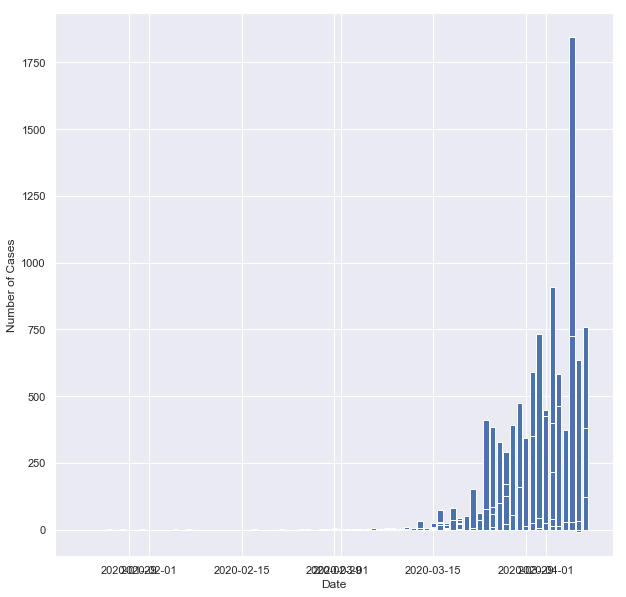

In [10]:
plt.figure(figsize = (10,10))
plt.bar(confirmed_df['Date'],confirmed_df['Difference'])
plt.ylabel('Number of Cases')
plt.xlabel('Date')

Note that difference is the daily case and cases is the totol cases

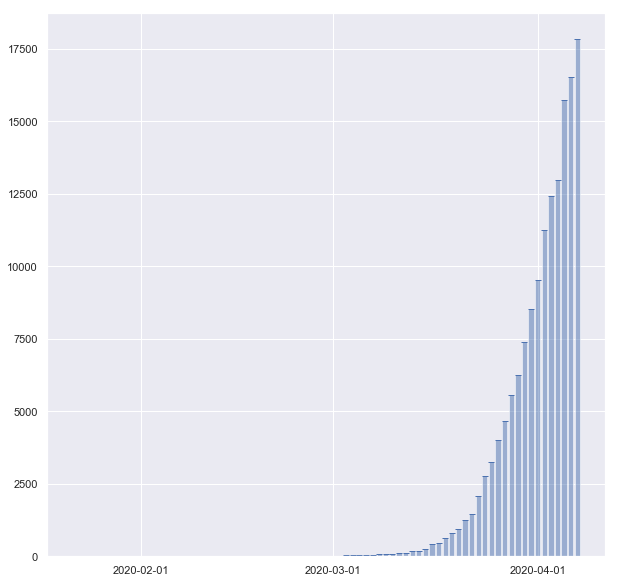

In [11]:
### this is how to set intervels with matplotlib dates
### note that Y is a capital
sns.set_style('darkgrid')
x = confirmed_df.groupby('Date').sum()['Cases']
f, ax = plt.subplots(figsize = (10,10))
ax.bar(x.index.values, x, alpha = .5 )
ax.plot(x.index.values, x , '_')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

In [12]:
df.Case_Type.unique()

array(['Deaths', 'Confirmed'], dtype=object)

In [13]:
df.sort_values('Date')

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
540385,Confirmed,0,0,1/22/2020,US,Alaska,Petersburg,"Petersburg, Alaska, US",2195.0,57.139789,-132.954100,Time Series,4/7/2020 8:34:39 PM
522364,Confirmed,0,0,1/22/2020,US,Kentucky,Trigg,"Trigg, Kentucky, US",21221.0,36.807670,-87.873337,Time Series,4/7/2020 8:34:39 PM
522365,Confirmed,0,0,1/22/2020,US,Louisiana,Natchitoches,"Natchitoches, Louisiana, US",22069.0,31.723216,-93.098165,Time Series,4/7/2020 8:34:39 PM
522366,Deaths,0,0,1/22/2020,Eritrea,NaN,NaN,NaN,NaN,15.179400,39.782300,Time Series,4/7/2020 8:34:39 PM
522367,Deaths,0,0,1/22/2020,US,Texas,Liberty,"Liberty, Texas, US",48291.0,30.151527,-94.812056,Time Series,4/7/2020 8:34:39 PM
522368,Deaths,0,0,1/22/2020,US,Oklahoma,Johnston,"Johnston, Oklahoma, US",40069.0,34.314405,-96.660115,Time Series,4/7/2020 8:34:39 PM
522369,Confirmed,0,0,1/22/2020,US,Indiana,Hendricks,"Hendricks, Indiana, US",18063.0,39.767190,-86.510373,Time Series,4/7/2020 8:34:39 PM
522370,Confirmed,0,0,1/22/2020,US,Maine,Penobscot,"Penobscot, Maine, US",23019.0,45.401946,-68.650205,Time Series,4/7/2020 8:34:39 PM
522371,Deaths,0,0,1/22/2020,US,Virginia,Amelia,"Amelia, Virginia, US",51007.0,37.340810,-77.985846,Time Series,4/7/2020 8:34:39 PM
522372,Confirmed,0,0,1/22/2020,US,Virginia,James City,"James City, Virginia, US",51095.0,37.311570,-76.769506,Time Series,4/7/2020 8:34:39 PM


In [14]:
df.head()

,Case_Type,Cases,Difference,Date,Country_Region,Province_State,Admin2,Combined_Key,FIPS,Lat,Long,Table_Names,Prep_Flow_Runtime
0,Deaths,0,0,2/27/2020,Bahamas,NaN,NaN,NaN,NaN,25.0343,-77.3963,Time Series,4/7/2020 8:34:39 PM
1,Confirmed,16,0,2/16/2020,Germany,NaN,NaN,NaN,NaN,51.0000,9.0000,Time Series,4/7/2020 8:34:39 PM
2,Deaths,0,0,1/31/2020,Canada,Alberta,NaN,NaN,NaN,53.9333,-116.5765,Time Series,4/7/2020 8:34:39 PM
3,Deaths,0,0,3/4/2020,Australia,Queensland,NaN,NaN,NaN,-28.0167,153.4000,Time Series,4/7/2020 8:34:39 PM
4,Confirmed,0,0,1/25/2020,Suriname,NaN,NaN,NaN,NaN,3.9193,-56.0278,Time Series,4/7/2020 8:34:39 PM


In [15]:
df.columns

Index(['Case_Type', 'Cases', 'Difference', 'Date', 'Country_Region',
       'Province_State', 'Admin2', 'Combined_Key', 'FIPS', 'Lat', 'Long',
       'Table_Names', 'Prep_Flow_Runtime'],
      dtype='object')